## To build a multiple linear regression model for the prediction of car prices

### Importing and Understanding Data

In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the columns of the data
pd.set_option('display.max_columns', None)

In [660]:
# To avoid diaplayong warnings
import warnings
warnings.filterwarnings('ignore')

In [661]:
# Read dataset
carprice = pd.read_csv("CarPrice_Assignment.csv")
print(carprice.columns)

# Checking if the data set has null values. 
print(carprice.isnull().sum())

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [662]:
# Checking for data type
print(carprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [663]:
# Checking outliers
carprice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [664]:
# Get the interquartile range (IQR) of all columns, it is a measure of statistical dispersion.
Q1 = carprice.quantile(0.25)
Q3 = carprice.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

car_ID               102.00
symboling              2.00
wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64


In [665]:
print(carprice.shape)
carprice.head()

(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

### Data Preparation

In [666]:
# Get only the company names
carprice['CarCompany'] =carprice['CarName'].apply(lambda x : x.split(' ')[0])
carprice['CarCompany'] = carprice['CarCompany'].str.lower()
print(carprice['CarCompany'].unique())

# Correcting spelling mistakes of company names
carprice['CarCompany'].replace('maxda', 'mazda' ,inplace = True)
carprice['CarCompany'].replace('porcshce' , 'porsche' ,inplace = True)
carprice['CarCompany'].replace('toyouta' , 'toyota' ,inplace = True)
carprice['CarCompany'].replace('volkswagen' , 'vokswagen' ,inplace = True)
print(carprice['CarCompany'].unique())

# Drop the Car ID and CarName column 
carprice.drop(['car_ID'], axis = 1,inplace = True)
# Drop CarName as car company is driven from CarName
carprice.drop(['CarName'], axis = 1, inplace = True)


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'vokswagen' 'vw' 'volvo']


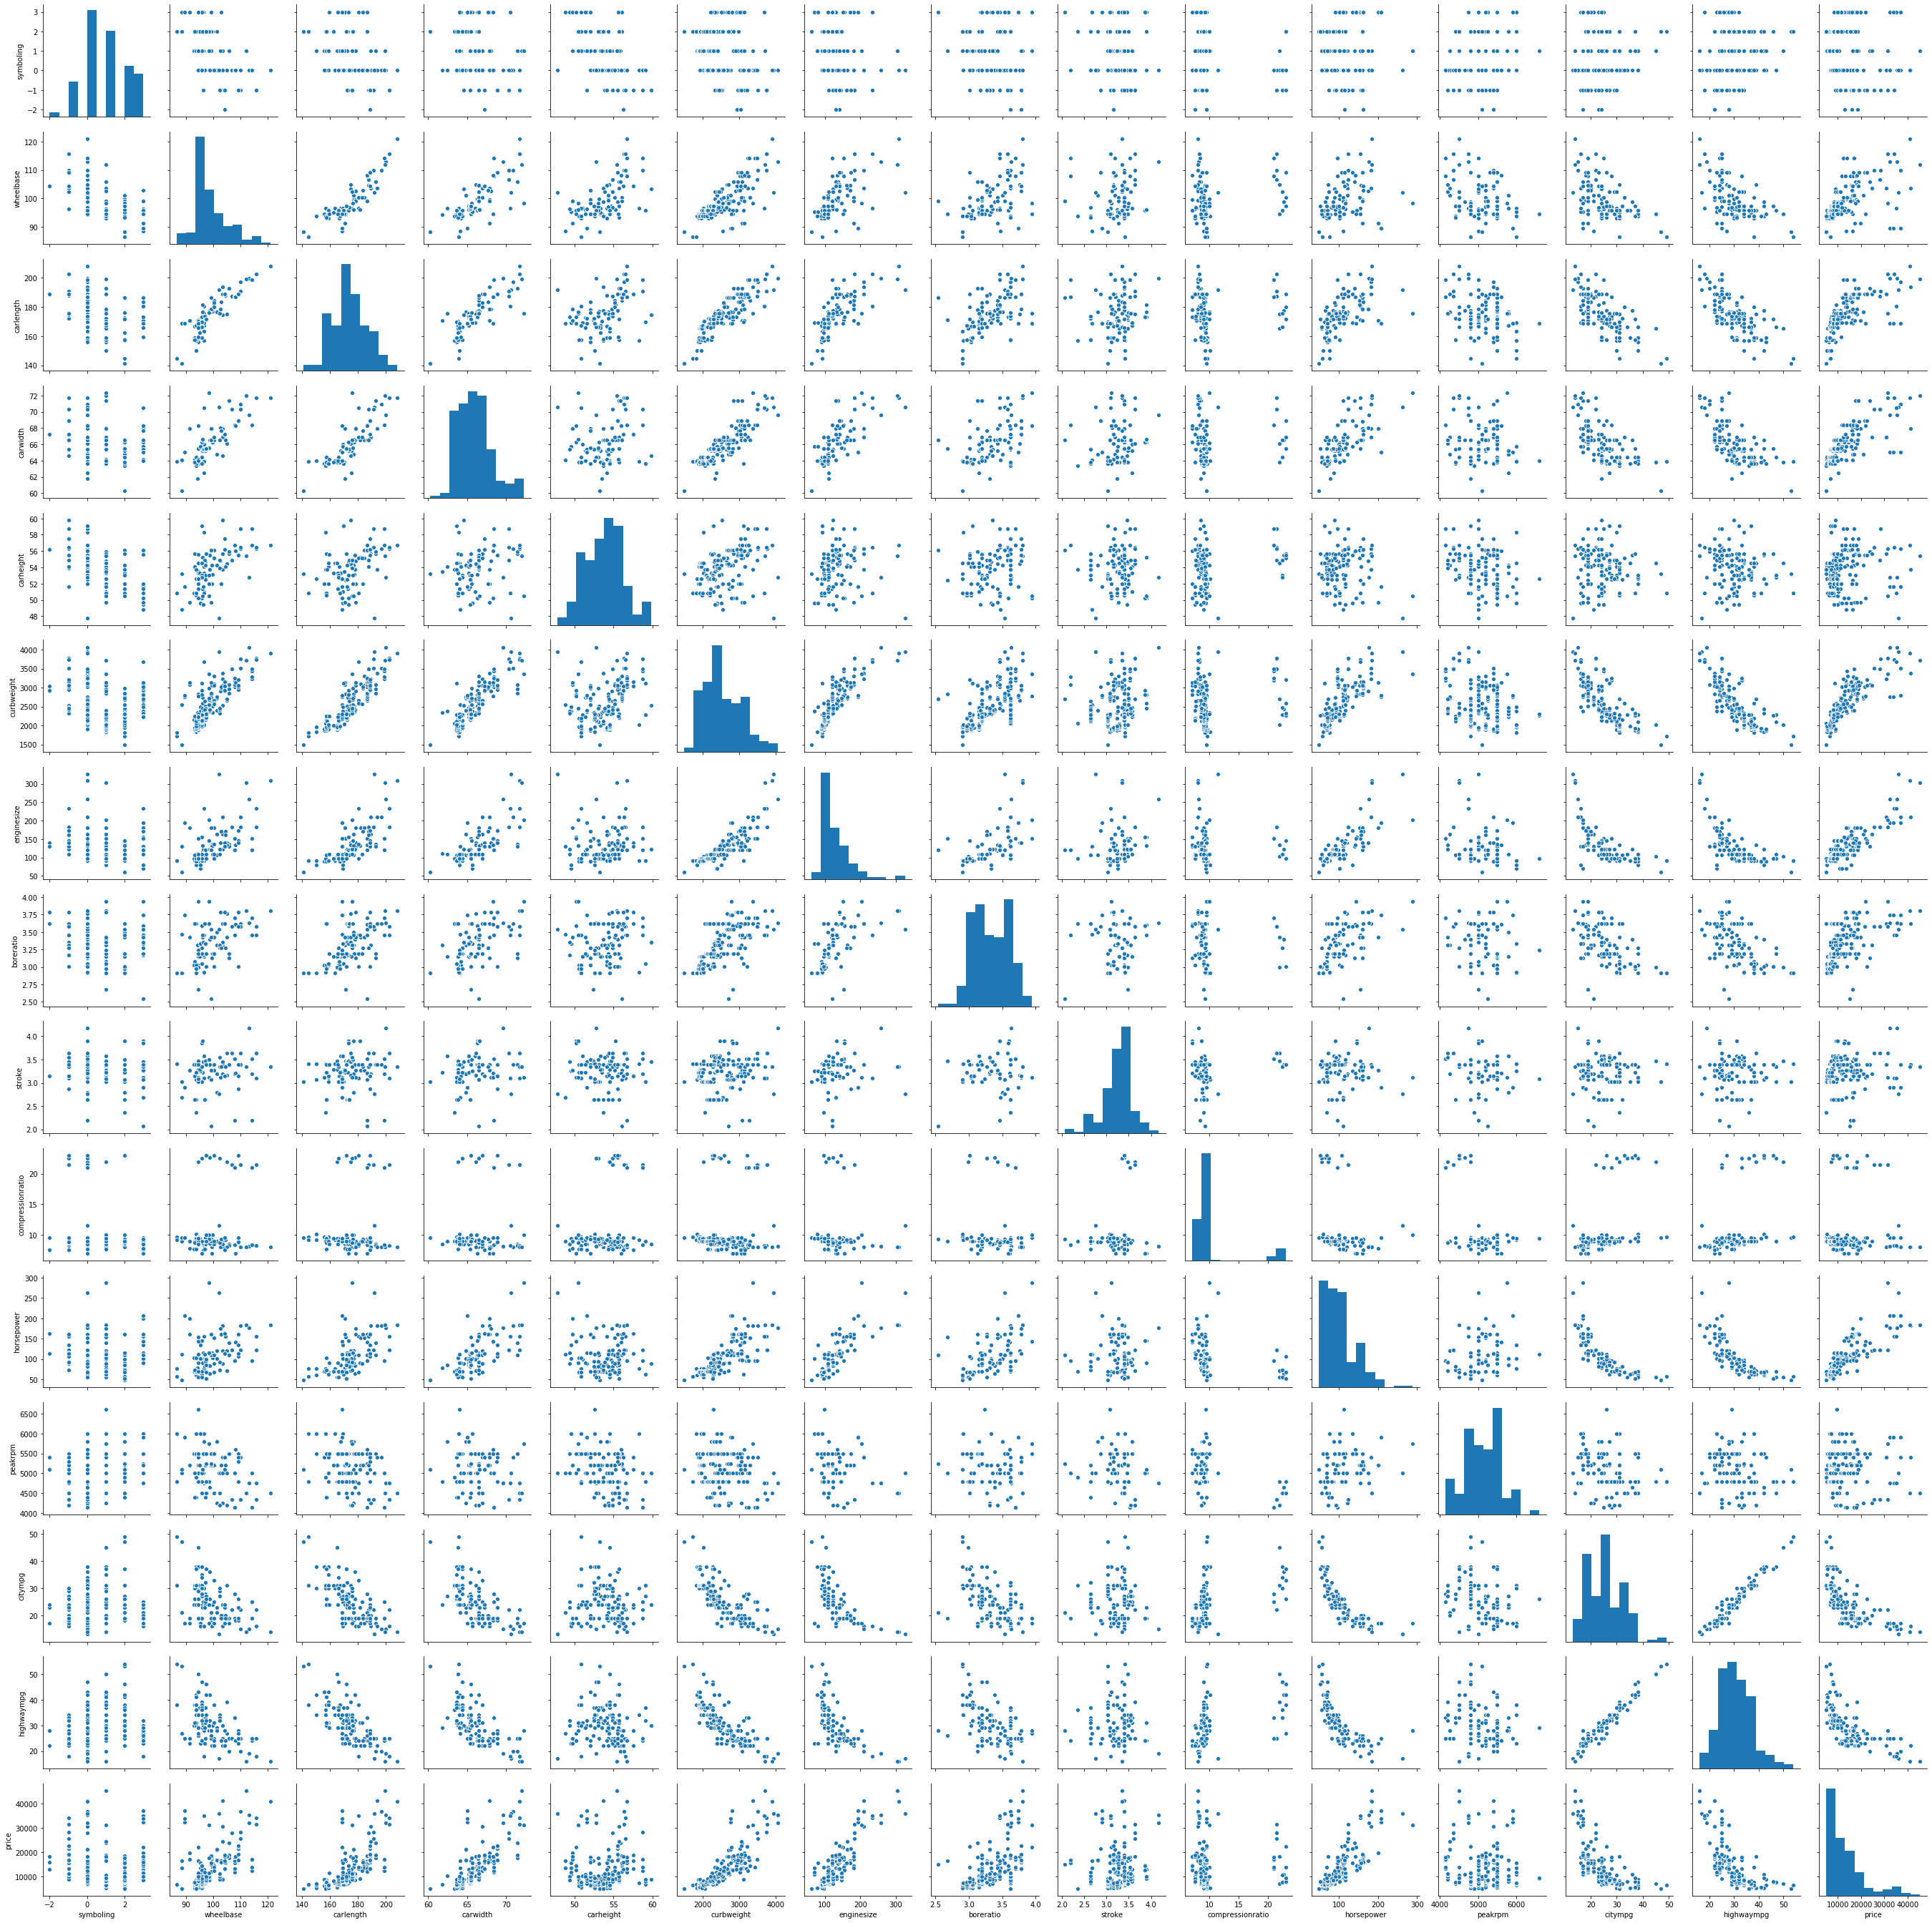

In [667]:
# Visualising all independent variables(numeric data) with price using pair plots
carprice_numeric = carprice[['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio',
'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

carprice_numeric.head()
sns.pairplot(carprice_numeric)
plt.show()

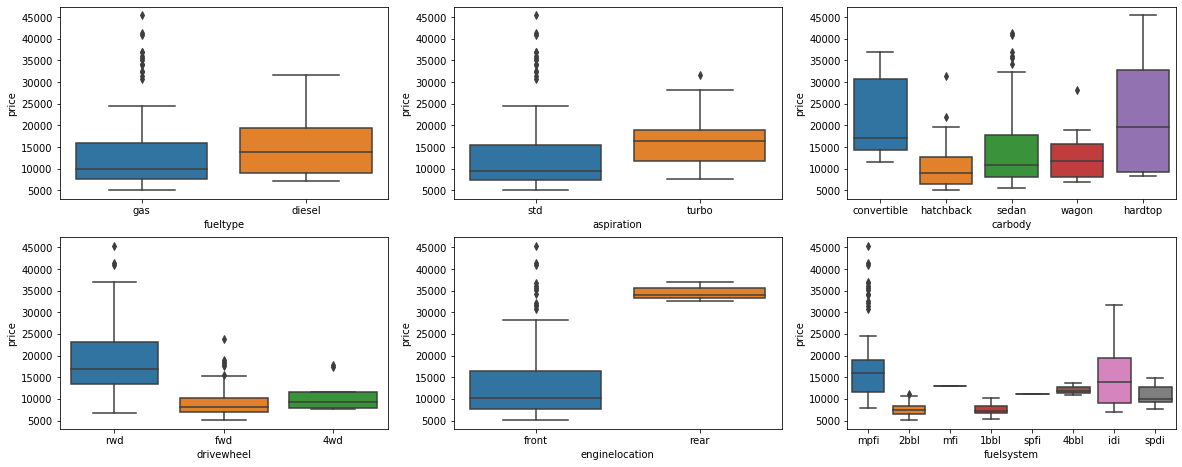

In [668]:
# Visualising the categorical data using box plots
plt.figure(figsize = (20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)

### From the above analysis we can see that 'price'(dependent variable) variation on the following independent variables.
### Categorical Variables - price is high for 
#### fuelsystem - Diesel
#### aspiration - turbo
#### carbody - hardtop and convertible
#### drivewheel - rwd
#### enginelocation - front
#### fuelsystem - mpfi

### Numeric Variables - price is variation is high for 
#### 'horsepower',  'boreratio','wheelbase', 'carlength', 'carwidth' , 'carheight', 'highwaympg', citympg, compressionratio, 'stroke'

#### Note :price  is less for all other remaining variables of the carprice data set. Hence,  Company can accordingly manipulate the car designs

In [669]:
carprice.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi

<Figure size 1800x432 with 0 Axes>

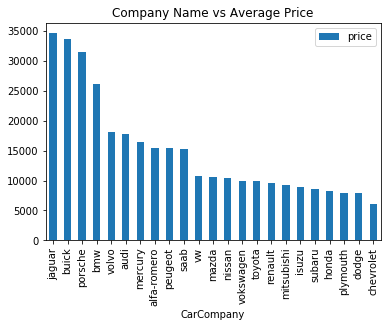

In [670]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(carprice.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

In [671]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany'],
      dtype='object')

### So, the Jaguar company cars are the costliest on an average, and then comes dodge, porsche, mazda etc.

### Data Encoding

In [672]:
# Deriving variable carrange for carCompany, to segment the companies with low, medium and high cost
carprice['CarRange'] = pd.cut(carprice['price'], bins=[0, 25000, 35000, 100000],
                                            labels= ['Low', 'medium', 'high'], right=False)
carprice.drop(['CarCompany'], axis = 1, inplace = True)

In [673]:
# Encode the categorical variables(using dummy variables)
# Function to get dummy columns and concat the new columns and drop the old
def cat_var_handling(df, col):
    temp = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df = df.drop([col], axis = 1)
    return df
df = cat_var_handling(carprice, 'fueltype')
df = cat_var_handling(df, 'doornumber')
df = cat_var_handling(df, 'cylindernumber')
df = cat_var_handling(df, 'carbody')
df = cat_var_handling(df, 'aspiration')
df = cat_var_handling(df, 'drivewheel')
df = cat_var_handling(df, 'enginelocation')
df = cat_var_handling(df, 'enginetype')
df = cat_var_handling(df, 'fuelsystem')
carprice_encde = cat_var_handling(df, 'CarRange')
carprice_encde.head()
carprice_encde.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'two',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'turbo', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'medium', 'high'],
      dtype='object')

In [674]:
carprice_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692   
125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388   
166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973   
1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171   
199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401   

     enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
122    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020   
125    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020   
166    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000   
1      0.260377   0.626984  0.247475           0.12500    0.262500  0.346939   
199    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755   

      citympg  highwaympg  gas  two  five  four  six  three  twelve  two  \
122  0.500000    0.567568    1    0     0     1    0      0       0    0   
125  0.166667    0.270270    1    1     0     1    0      0       0    0   
166  0.361111    0.324324    1    1     0     1    0      0       0    0   
1    0.222222    0.270270    1    1     0     1    0      0       0    0   
199  0.111111    0.135135    1    0     0     1    0      0       0    0   

     hardtop  hatchback  sedan  wagon  turbo  fwd  rwd  rear  dohcv  l  ohc  \
122        0          0      1      0      0    1    0     0      0  0    1   
125        0          1      0      0      0    0    1     0      0  0    1   
166        0          1      0      0      0    0    1     0      0  0    0   
1          0          0      0      0      0    0    1     0      0  0    0   
199        0          0      0      1      1    0    1     0      0  0    1   

     ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  medium  high  
122     0     0      0     1     0    0    0     0     0     0       0     0  
125     0     0      0     0     0    0    0     1     0     0       0     0  
166     0     0      0     0     0    0    0     1     0     0       0     0  
1       0     0      0     0     0    0    0     1     0     0       0     0  
199     0     0      0     0     0    0    0     1     0     0       0     0

## Splitting the Data into Training and Testing Sets

In [675]:
# Split the data into train and test data in 70:30 ratio
import sklearn
from sklearn.model_selection import train_test_split
print("carprice data:", carprice_encde.shape)

carprice_train, carprice_test = train_test_split(carprice_encde, train_size = 0.7, random_state = 100)
print("train data:", carprice_train.shape)
print("test data:",carprice_test.shape)
carprice_train.columns

carprice data: (205, 46)
train data: (143, 46)
test data: (62, 46)


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'two',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'turbo', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'medium', 'high'],
      dtype='object')

### Rescaling the Features 

In [676]:
# Feature scaling using MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
carprice_train[num_vars] = scaler.fit_transform(carprice_train[num_vars])

carprice_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692   
125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388   
166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973   
1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171   
199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401   

     enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
122    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020   
125    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020   
166    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000   
1      0.260377   0.626984  0.247475           0.12500    0.262500  0.346939   
199    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755   

      citympg  highwaympg     price  gas  two  five  four  six  three  twelve  \
122  0.500000    0.567568  0.068818    1    0     0     1    0      0       0   
125  0.166667    0.270270  0.466890    1    1     0     1    0      0       0   
166  0.361111    0.324324  0.122110    1    1     0     1    0      0       0   
1    0.222222    0.270270  0.314446    1    1     0     1    0      0       0   
199  0.111111    0.135135  0.382131    1    0     0     1    0      0       0   

     two  hardtop  hatchback  sedan  wagon  turbo  fwd  rwd  rear  dohcv  l  \
122    0        0          0      1      0      0    1    0     0      0  0   
125    0        0          1      0      0      0    0    1     0      0  0   
166    0        0          1      0      0      0    0    1     0      0  0   
1      0        0          0      0      0      0    0    1     0      0  0   
199    0        0          0      0      1      1    0    1     0      0  0   

     ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  medium  \
122    1     0     0      0     1     0    0    0     0     0     0       0   
125    1     0     0      0     0     0    0    0     1     0     0       0   
166    0     0     0      0     0     0    0    0     1     0     0       0   
1      0     0     0      0     0     0    0    0     1     0     0       0   
199    1     0     0      0     0     0    0    0     1     0     0       0   

     high  
122     0  
125     0  
166     0  
1       0  
199     0

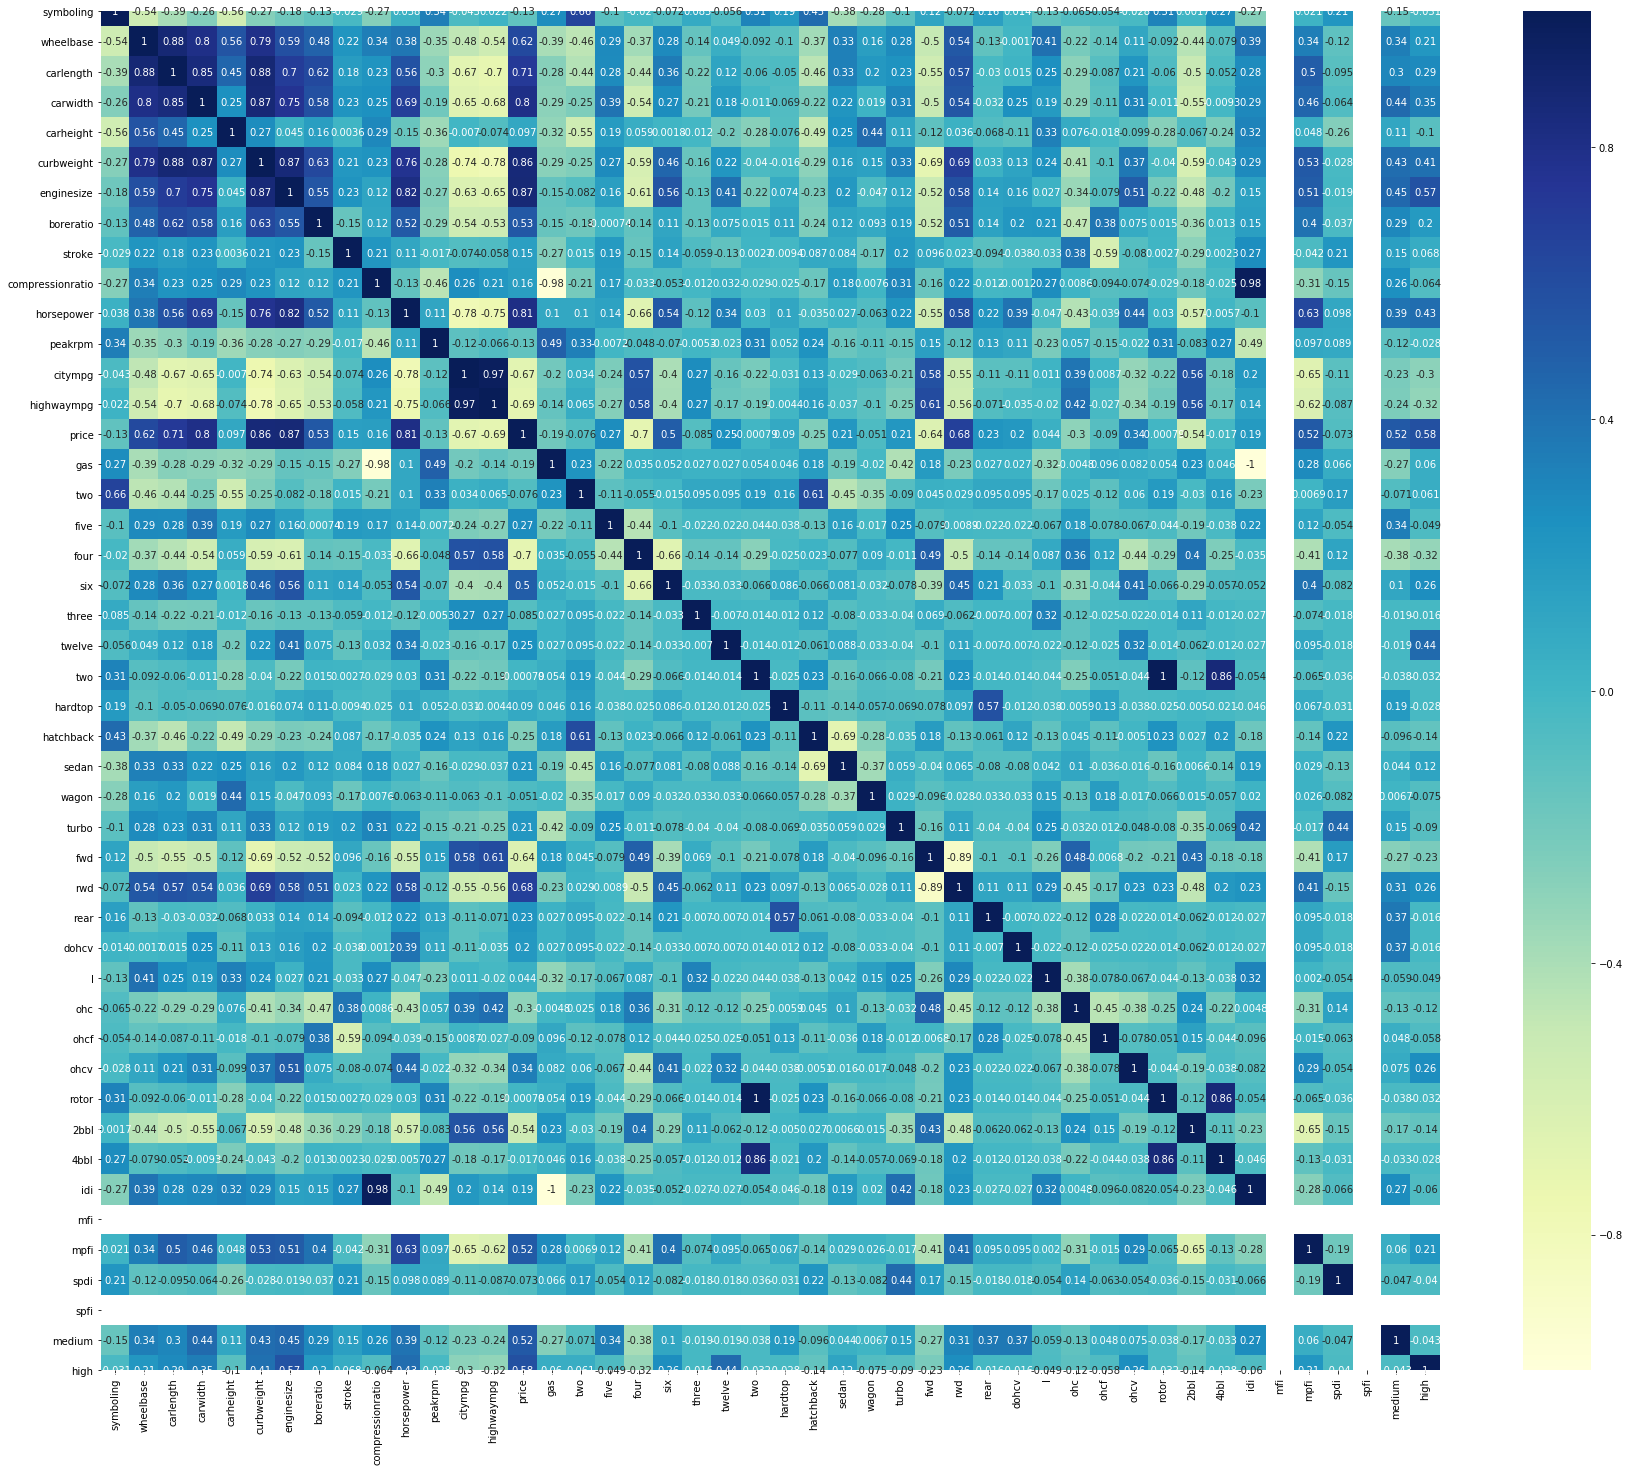

In [677]:
plt.figure(figsize = (30, 25))
sns.heatmap(carprice_train.corr(), annot = True,  cmap="YlGnBu")
plt.show()

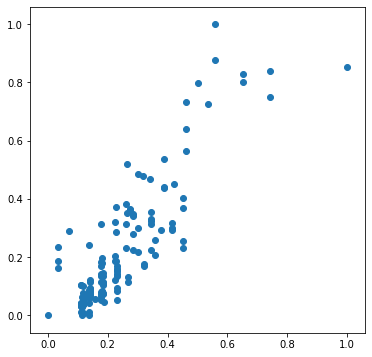

In [678]:
# The price has high correlation with enginesize.
plt.figure(figsize = (6,6))
plt.scatter(carprice_train.enginesize, carprice_train.price)

### Building Model using RFE + manual approach

In [679]:
# Model Building using RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
carprice_train.head()

# Get the training data
y_train = carprice_train.pop('price')
X_train = carprice_train
lm = LinearRegression()
lm.fit(X_train, y_train)

# Selecting first 15 variables that are ranked with 1.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [680]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 10),
 ('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 22),
 ('curbweight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 24),
 ('citympg', False, 7),
 ('highwaympg', False, 8),
 ('gas', False, 13),
 ('two', False, 28),
 ('five', False, 19),
 ('four', False, 20),
 ('six', False, 25),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('hardtop', False, 2),
 ('hatchback', False, 3),
 ('sedan', False, 5),
 ('wagon', False, 4),
 ('turbo', False, 14),
 ('fwd', False, 15),
 ('rwd', False, 27),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 26),
 ('ohc', True, 1),
 ('ohcf', False, 29),
 ('ohcv', False, 17),
 ('rotor', True, 1),
 ('2bbl', False, 18),
 ('4bbl', False, 21),
 ('idi', False, 12),
 ('mfi', False, 30),
 ('mpfi', False, 23),
 ('spdi', False, 11),
 ('spfi', False, 31),
 ('medium',

In [681]:
X_train.columns[rfe.support_]
X_train_rfe_cols = X_train.columns[rfe.support_]
X_train_rfe_cols

Index(['wheelbase', 'carwidth', 'enginesize', 'stroke', 'compressionratio',
       'horsepower', 'three', 'twelve', 'two', 'rear', 'dohcv', 'ohc', 'rotor',
       'medium', 'high'],
      dtype='object')

In [682]:
X_train.columns[~rfe.support_]

Index(['symboling', 'carlength', 'carheight', 'curbweight', 'boreratio',
       'peakrpm', 'citympg', 'highwaympg', 'gas', 'two', 'five', 'four', 'six',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'turbo', 'fwd', 'rwd', 'l',
       'ohcf', 'ohcv', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [683]:
# Building model using statsmodel, for the detailed statistics
import statsmodels.api as sm
X_train_rfe = X_train[X_train_rfe_cols]

# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create first fitted model
lm = sm.OLS(y_train, X_train_rfe).fit() 

# Check for parameters obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.37e-71
Time:                        22:31:31   Log-Likelihood:                 221.26
No. Observations:                 143   AIC:                            -410.5
Df Residuals:                     127   BIC:                            -363.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1229      0.023  

In [684]:
# Remove variable with high p value
X_train_new = X_train_rfe.drop('two',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Rebuild the model available variables
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.75e-72
Time:                        22:31:31   Log-Likelihood:                 221.18
No. Observations:                 143   AIC:                            -412.4
Df Residuals:                     128   BIC:                            -367.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1201      0.022  

Features    VIF
0              const  22.94
3         enginesize  12.12
6         horsepower   7.94
2           carwidth   6.15
1          wheelbase   3.93
11               ohc   2.43
13            medium   2.43
14              high   2.19
4             stroke   2.00
10             dohcv   1.92
12             rotor   1.91
8             twelve   1.70
5   compressionratio   1.66
9               rear   1.60
7              three   1.17

###  Dropping variables and rebuilding the model by removing the variables one by one until p value is < 0,05 and VIF < 5

In [685]:
# Remove constant as it has high VIF
X_train_new = X_train_new.drop('const',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.75e-72
Time:                        22:31:32   Log-Likelihood:                 221.18
No. Observations:                 143   AIC:                            -412.4
Df Residuals:                     128   BIC:                            -367.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1201      0.022  

Features    VIF
2         enginesize  41.32
1           carwidth  40.17
5         horsepower  22.96
3             stroke  22.62
0          wheelbase  19.77
10               ohc   6.99
4   compressionratio   2.73
12            medium   2.18
13              high   2.09
9              dohcv   1.92
11             rotor   1.91
7             twelve   1.71
8               rear   1.49
6              three   1.09

In [686]:
# Remove enginesize as it has high VIF
X_train_new = X_train_new.drop('enginesize',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.52e-68
Time:                        22:31:32   Log-Likelihood:                 208.49
No. Observations:                 143   AIC:                            -389.0
Df Residuals:                     129   BIC:                            -347.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1080      0.024  

Features    VIF
1           carwidth  39.45
0          wheelbase  19.13
2             stroke  18.78
4         horsepower  13.81
9                ohc   6.24
3   compressionratio   2.67
11            medium   1.78
8              dohcv   1.69
6             twelve   1.52
12              high   1.50
7               rear   1.49
10             rotor   1.18
5              three   1.07

In [687]:
# Remove rear as it has high p value > 0.05
X_train_new = X_train_new.drop('rear',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.28e-69
Time:                        22:31:32   Log-Likelihood:                 206.81
No. Observations:                 143   AIC:                            -387.6
Df Residuals:                     130   BIC:                            -349.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0971      0.023  

Features    VIF
1           carwidth  39.20
2             stroke  18.69
0          wheelbase  18.54
4         horsepower  12.06
8                ohc   6.17
3   compressionratio   2.61
10            medium   1.52
7              dohcv   1.50
11              high   1.50
6             twelve   1.49
9              rotor   1.18
5              three   1.07

In [688]:
# Remove carwidth as it has high VIF
X_train_new = X_train_new.drop('carwidth',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     150.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.94e-69
Time:                        22:31:32   Log-Likelihood:                 203.93
No. Observations:                 143   AIC:                            -383.9
Df Residuals:                     131   BIC:                            -348.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0806      0.022  

Features    VIF
1             stroke  18.25
3         horsepower   8.34
0          wheelbase   7.60
7                ohc   6.00
2   compressionratio   2.50
9             medium   1.52
5             twelve   1.49
10              high   1.49
6              dohcv   1.46
8              rotor   1.16
4              three   1.06

In [689]:
# Remove stroke as it has high VIF
X_train_new = X_train_new.drop('stroke',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.96e-64
Time:                        22:31:32   Log-Likelihood:                 189.58
No. Observations:                 143   AIC:                            -357.2
Df Residuals:                     132   BIC:                            -324.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1270      0.022  

Features   VIF
0         wheelbase  6.95
2        horsepower  5.53
1  compressionratio  2.25
6               ohc  2.07
8            medium  1.48
9              high  1.48
5             dohcv  1.42
4            twelve  1.38
7             rotor  1.07
3             three  1.00

In [690]:
# Remove three as it has high p value
X_train_new = X_train_new.drop('three',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.82e-65
Time:                        22:31:32   Log-Likelihood:                 188.59
No. Observations:                 143   AIC:                            -357.2
Df Residuals:                     133   BIC:                            -327.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1180      0.022  

Features   VIF
0         wheelbase  6.95
2        horsepower  5.53
1  compressionratio  2.25
5               ohc  2.07
7            medium  1.48
8              high  1.48
4             dohcv  1.42
3            twelve  1.38
6             rotor  1.06

In [691]:
# Remove rotor as it has high p value
X_train_new = X_train_new.drop('rotor',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 

print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.57e-65
Time:                        22:31:32   Log-Likelihood:                 187.53
No. Observations:                 143   AIC:                            -357.1
Df Residuals:                     134   BIC:                            -330.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1106      0.021  

Features   VIF
0         wheelbase  6.94
2        horsepower  5.35
1  compressionratio  2.23
5               ohc  2.03
6            medium  1.47
7              high  1.47
4             dohcv  1.41
3            twelve  1.38

In [692]:
# Remove ohc as it has high p value
X_train_new = X_train_new.drop('ohc',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.76e-66
Time:                        22:31:32   Log-Likelihood:                 185.76
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     135   BIC:                            -331.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0835      0.015  

Features   VIF
0         wheelbase  6.18
2        horsepower  5.33
1  compressionratio  2.19
6              high  1.46
4             dohcv  1.41
5            medium  1.41
3            twelve  1.37

In [693]:
# Remove wheelbase as it has high VIF value
X_train_new = X_train_new.drop('wheelbase',  axis = True, errors = 'ignore')
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.93e-60
Time:                        22:31:32   Log-Likelihood:                 169.01
No. Observations:                 143   AIC:                            -324.0
Df Residuals:                     136   BIC:                            -303.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0399      0.015  

Features   VIF
1        horsepower  1.83
5              high  1.46
4            medium  1.41
0  compressionratio  1.35
2            twelve  1.27
3             dohcv  1.25

### ## Residual Analysis of the train data

Text(0.5, 0, 'Errors')

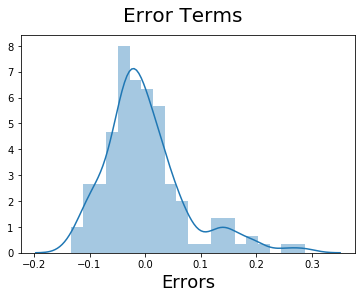

In [694]:
type(X_train_lm)
X_train_lm.head()
y_train_price = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

#### Applying the scaling on the test sets

In [695]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
carprice_test[num_vars] = scaler.transform(carprice_test[num_vars])

In [696]:
# Dividing X_test and y_test
y_test = carprice_test.pop('price')

In [697]:
X_test = carprice_test
carprice_test.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'gas', 'two', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'turbo', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'medium', 'high'],
      dtype='object')

In [698]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.columns


Index(['const', 'compressionratio', 'horsepower', 'twelve', 'dohcv', 'medium',
       'high'],
      dtype='object')

In [699]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

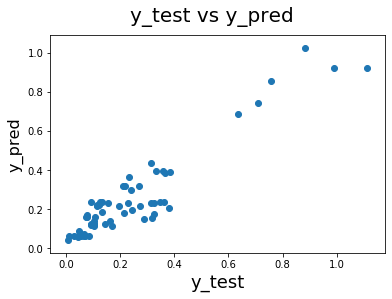

In [700]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    


In [701]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print("r2 Score on the Test data  is -->", r2_score(y_test, y_pred))
print("R-squared on the train data is --> 0.881" )
print(" Adj. R-squared is --> 0.876")

r2 Score on the Test data  is --> 0.8749538789603949
R-squared on the train data is --> 0.881
 Adj. R-squared is --> 0.876


### Results:
### This shows that the Variables -->  'compressionratio', 'horsepower', 'cylindernumber', 'enginetype', 'medium',   and 'car company'  are significant in predicting the price of the car

#### r2 Score on the Test data  is --> 0.8749538789603949
####  R-squared on the train data is --> 0.881
#### Adj. R-squared is --> 0.876